# Python Assignment 3

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


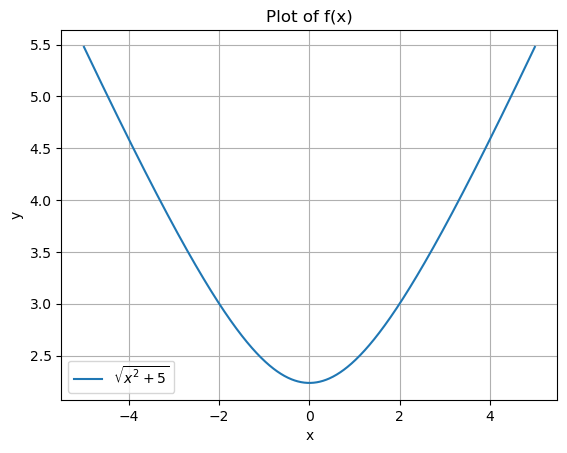

In [213]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define the function f(x).
x_val = np.linspace(-5,5,1000) # I plot the graph for x over [-5,5]
y_val = np.array(np.sqrt(x_val**2+5)) # Assign f(x) value for each x

# Plot the function f(x), np.linspace might be helpful.
x = sp.Symbol('x')
y = sp.sqrt(x**2 + 5)
legend_label = f"${sp.latex(y)}$"
plt.plot(x_val,y_val,label=legend_label)
plt.title("Plot of f(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

[2.80000000e+00 2.01859620e+00 1.34850706e+00 8.32079135e-01
 4.83325601e-01 2.72054845e-01 1.51278846e-01 8.37791877e-02
 4.63382663e-02 2.56196119e-02 1.41629251e-02 7.82919950e-03
 4.32789650e-03 2.39240597e-03 1.32249011e-03 7.31054655e-04
 4.04117092e-04 2.23390437e-04 1.23487197e-04 6.82620437e-05
 3.77343297e-05 2.08590245e-05 1.15305851e-05 6.37395070e-06
 3.52343329e-06 1.94770602e-06 1.07666541e-06 5.95165999e-07
 3.28999673e-07 1.81866546e-07 1.00533354e-07 5.55734714e-08
 3.07202594e-08 1.69817418e-08 9.38727597e-09 5.18915853e-09
 2.86849629e-09 1.58566575e-09 8.76534468e-10 4.84536337e-10
 2.67845100e-10 1.48061130e-10 8.18461795e-11 4.52434553e-11
 2.50099670e-11 1.38251697e-11 7.64236586e-12 4.22459594e-12
 2.33529920e-12 1.29092165e-12 7.13603937e-13]


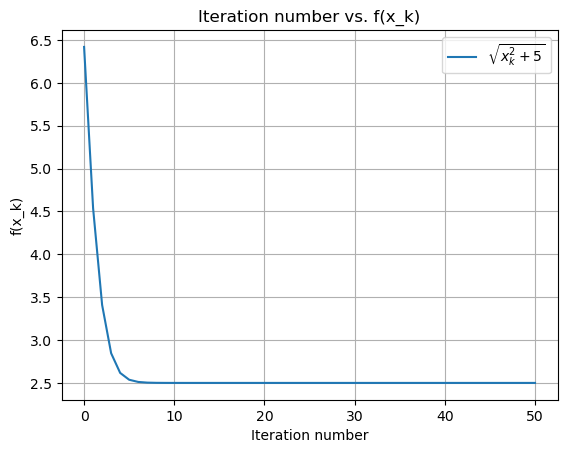

In [231]:
# Define the derivative of the function f(x), for gradient descent
def yprime(x): # Function to return f'(x)
    return x*(x**2+5)**(-1/2)

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def GradientDescent(x0, step_size, num_iterations):
    x_k = np.zeros(num_iterations+1)
    x_k[0] = x0 # Assign initial value, with 0 iteration
    for i in range(0,num_iterations): # Assign x_k from 1 iteration to 50 iterations
        x_k[i+1] = x_k[i]-step_size*yprime(x_k[i])
    return x_k

# set up/assign initial values
x0 = (9/5)+1 # ID: 11380901'9'
T = 50
alpha = 1
# Run gradient descent by calling the function
x_T = GradientDescent(x0,alpha,T)


# report x_T by printing out the value
print(x_T)

# Plot the f(x_k) values vs. iteration number
iteration_list = list(range(51)) # From 0 iteration to 50 iterations
fx_k = (x_T**2+5)**1/2 # Assign f(x) for x in each iteration
x_k = sp.Symbol('x_k')
y = sp.sqrt(x_k**2 + 5)
legend_label = f"${sp.latex(y)}$"
plt.plot(iteration_list, fx_k, label = legend_label)
plt.title('Iteration number vs. f(x_k)')
plt.xlabel('Iteration number')
plt.ylabel('f(x_k)')
plt.legend()
plt.grid()
plt.show()

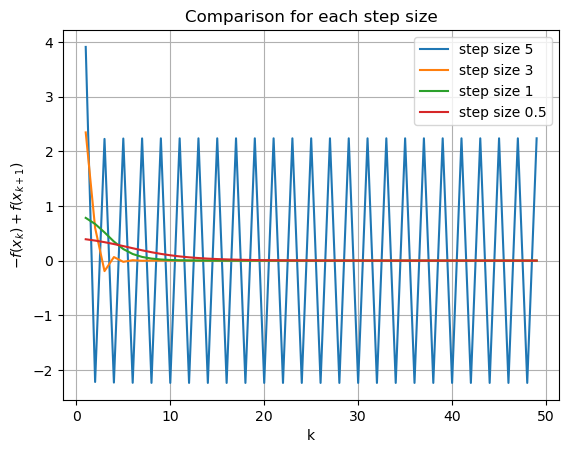

In [237]:
# create a list containing step sizes
stepsizes = [5,3,1,0.5]
# initialize a list to store the results from different step sizes
results_bysteps = []
# loop through the step sizes and perform GD and record results
def GradDesc_diff(x0,step_size,num_iterations):
    T = 0
    x_k = np.zeros(num_iterations)
    x_k[0] = x0
    for i in range(0,num_iterations-1):
        x_k[i+1] = x_k[i]-step_size*x_k[i]*(x_k[i]**2+5)**(-1/2)
    diff = []
    for i in range(1,num_iterations):
        diff.append(x_k[i-1]-x_k[i])
    return diff
for i in range(0,4):
    results_bysteps.append(GradDesc_diff(x0,stepsizes[i],T))

k = list(range(1,50))
plt.plot(k,results_bysteps[0],label='step size 5')
plt.plot(k,results_bysteps[1],label='step size 3')
plt.plot(k,results_bysteps[2],label='step size 1')
plt.plot(k,results_bysteps[3],label='step size 0.5')
plt.title('Comparison for each step size')
plt.xlabel('k')
x_k = sp.Symbol('x_k')
x_k1 = sp.Symbol('x_k+1')
f = sp.Function('f')
expr = f(x_k1) - f(x_k)
y_label = f"${sp.latex(expr)}$"
plt.ylabel(y_label)
plt.grid()
plt.legend()
plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
[3.83027501 0.5143017  4.08191266]


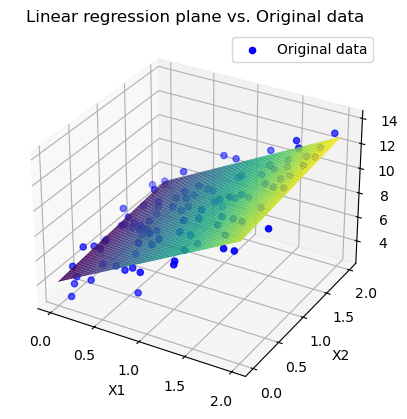

In [240]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(19)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
bias_terms = np.ones(100)
X = np.column_stack((X,bias_terms))

# Find theta using the normal equation 
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # normal equation can be found Python_Lecture_5

# Print the intercept and coefficients of the regression plane
print(theta) # The first two elements are coefficients. The last one is the intercept. 

# Plot the generated data and the regression plane

# Using linspace and meshgrid, I generated a regression plane.
X_1 = np.linspace(0,2,100)
X_2 = np.linspace(0,2,100)
X1,X2 = np.meshgrid(X_1,X_2)
y_pred = theta[0]*X1+theta[1]*X2+theta[2] # make a prediction for given x values

# Plot regression plane 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, y_pred, cmap='viridis')
# Plot original data 
ax.scatter(X[:,0], X[:,1], y, c='blue', marker='o', label='Original data')

plt.title('Linear regression plane vs. Original data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.legend()

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [248]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z)) # Calculation of Sigmoid function, it returns value between 0 and 1. 


np.random.seed(595)
X = np.random.rand(2, 100) # Assign X values, two variables
w_true = np.array([1.5, -2.5]) # True coefficients
b_true = 1.0  # True bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true) # Return values of hypothesis function, using sigmoid function. 
Y = (probabilities > 0.5).astype(int) 
# If the value of hypothesis function is greater than 0.5, it is converted to 1. Otherwise, it is convertd to 0.
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100) # Modification of X

# Split train and test data. 80% of train data and 20% of test data. 
X_train, X_test = X[:,:80], X[:,80:] 
Y_train, Y_test = Y[:80], Y[80:]

# Optimization for the weight(w) and bias(b)
w = np.zeros(X.shape[0]) # It will hold two elements
b = 0.0
learning_rate = 1
num_epochs = 5000

for epoch in range(num_epochs):
    A_train = sigmoid(np.dot(w.T, X_train) + b) # make a prediction, using hypothesis function

    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train) # Partial derivative of cost function respect to weight(w)
    dJdb = np.mean(A_train - Y_train) # Partial derivative of cost function respect to bias(b)

    w -= learning_rate * dJdw # Update w by subtracting the gradient scaled by learning_rate
    b -= learning_rate * dJdb # Update b by subtracting the gradient scaled by learninng_rate

A_train = sigmoid(np.dot(w.T, X_train) + b) # Using optimized value of w and b, make a new prediction 
predictions_train = (A_train > 0.5).astype(int) 
# Prediction value of train data: If the new prediction value is greater than 0.5, it will be converted to 1.
# Otherwise, it will be converted to 0. 

A_test = sigmoid(np.dot(w.T, X_test) + b) # Make a prediction in test data 
predictions_test = (A_test > 0.5).astype(int) 
# Prediction value of test data: If the new prediction value is greater than 0.5, it will be converted to 1.
# Otherwise, it will be converted to 0. 

train_accuracy = np.mean(predictions_train == Y_train) # Accuracy calculation for train data

test_accuracy = np.mean(predictions_test == Y_test) # Accuracy calculation for test data

# Accuracy is the proportion of correctly predicted values

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.89
Test Set Accuracy: 0.95


In [250]:
# Tuning for the best learning rate
learning_rate_values = [0.1,0.5,1.0,2.0,4.0,8.0]
num_epochs = 500
accuracy_by_lr = np.zeros(len(learning_rate_values))
w = np.zeros(X.shape[0])
b = 0.0
for epoch in range(num_epochs):
    A_train = sigmoid(np.dot(w.T, X_train) + b) # make a prediction, using hypothesis function
dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train) # Partial derivative of cost function respect to weight(w)
dJdb = np.mean(A_train - Y_train) # Partial derivative of cost function respect to bias(b)
for i in range(0,len(learning_rate_values)):
    w -= learning_rate_values[i] * dJdw # Update w by subtracting the gradient scaled by learning_rate
    b -= learning_rate_values[i] * dJdb # Update b by subtracting the gradient scaled by learninng_rate
    A_test = sigmoid(np.dot(w.T, X_test) + b) # Using optimized value of w and b, make a new prediction 
    predictions_test = (A_test > 0.5).astype(int) 
    accuracy_by_lr[i] = np.mean(predictions_test==Y_test)
print(accuracy_by_lr)
# I found there is no significant difference in learning rate from 0.1 to 8.0

[0.75 0.75 0.75 0.75 0.75 0.75]


In [254]:
# Tuning for the best number of epochs
num_epoch_values = [100, 500, 1000, 5000, 10000]
learning_rate = 4.0 #As I didn't find any significant difference between learning rate, I employed random value for learning rate
accuracy_by_numepoch = np.zeros(len(num_epoch_values))

for i, num_epochs in enumerate(num_epoch_values):
    w = np.zeros(X.shape[0])
    b = 0.0
    for epoch in range(num_epochs):
        A_train = sigmoid(np.dot(w.T,X_train)+b)
        dJdw = np.dot(X_train, (A_train-Y_train).T) / len(Y_train)
        dJdb = np.mean(A_train-Y_train)
        w -= learning_rate * dJdw
        b -= learning_rate * dJdb
    A_test = sigmoid(np.dot(w.T,X_test)+b)
    predictions_test = (A_test > 0.5).astype(int)
    accuracy_by_numepoch[i] = np.mean(predictions_test==Y_test)
print(accuracy_by_numepoch)
# Also, there is no significant difference in the number of epochs. 

[0.95 0.95 0.95 0.95 0.95]


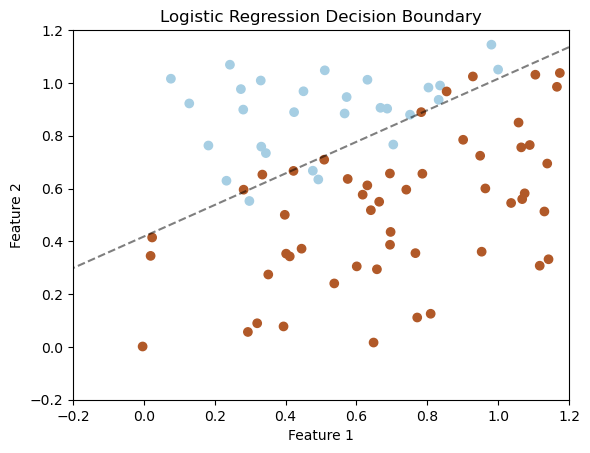

In [256]:
# Decision boundary for train data 
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired) # Generate scatter plot of two variabels
plt.xlim(-0.2, 1.2) 
plt.ylim(-0.2, 1.2)
ax = plt.gca() # Get current axis

xlim = ax.get_xlim() # Retrive limit for x
ylim = ax.get_ylim() # Retrive limit for y 
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)) # Generate 50*50 grid with given limits of x and y
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b # Combine x and y grid points into 2D array 
Z = sigmoid(Z) # Compute predictions for logistic regression
Z = Z.reshape(xx.shape) # Change the shape of Z to 2D shape for visualization 
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--']) # Draw contour line
# Contour line should be drawn at the probability of 0.5

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

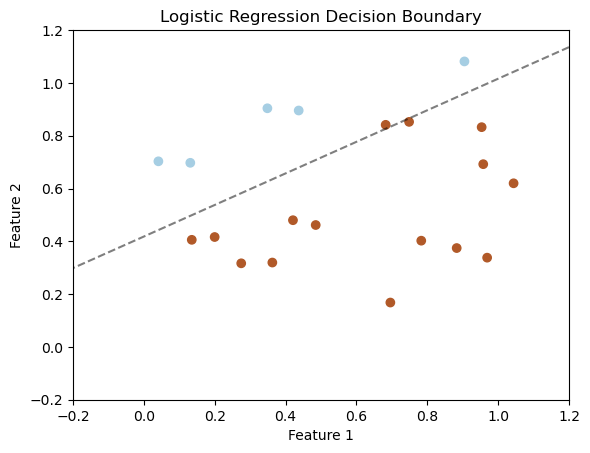

In [258]:
# Decision boundary for test data, identical to above
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5